## Final Project Submission

Please fill out:
* **Student name**: Isobel Daley
* **Student pace**: Full Time
* **Scheduled project review date/time**: 6th August 2019 @ 6pm BST
* **Instructor name**: Abhineet Kulkarni
* **Blog post URL**:


# King County House Price Project

## Introduction

The objective of this project is to create a model able to provide robust predictions of house prices in the area of King County, Seattle.  

The following notebook, sets out the steps taken to create this model.  This includes:

- Data Cleaning
- Exploratory Data Analysis
- Building the Model
- Interpretation

## Business Requirement

This model will provide real estate investors with a means of estimating the market value of a house on the basis of measurable characteristics (number of bedrooms, size, location etc).  This will enable investors to assess the valuation of each proprety, and understand whether the proposed sales price represents good value.

## Importing Required Libraries


In [1]:
# Pandas is used for data manipulation and analysis
# Numpy is used to create multidimensional arrays, and to perform mathematical function

import pandas as pd
import numpy as np

# Matplotlib is used to create visualisations.  
# Seaborn sits on top of Matplotlib, allowing the creation of more visually appealing visualisations

import matplotlib.pyplot as plt
import seaborn as sns

## Importing the Data

Pandas provides the functionality necessary to import data.  The data has been provided in CSV file "kc_house_data.csv".  It is available in the repository in which we are working.  

The data can therefore be imported using the pd.read_csv() function.

In [2]:
kc_data = pd.read_csv("kc_house_data.csv")

## Getting to Know the Data

Before we start working with the data, we need to understand its key characteristics.  This includes:

- The column names
- The nature of each variable (e.g. is it numerical or text, continuous or discrete)
- The presence of null values/missing data

### Column Names

For ease of reference, the column names are provided below, alongside a brief description.

* **id** - unique identified for a house
* **dateDate** - house was sold
* **pricePrice** -  is prediction target
* **bedroomsNumber** -  of Bedrooms/House
* **bathroomsNumber** -  of bathrooms/bedrooms
* **sqft_livingsquare** -  footage of the home
* **sqft_lotsquare** -  footage of the lot
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors

### Variable Characteristics

To understand the nature of each variable, we can first use the .info() function to provide identify the type and number of each variable.

In [3]:
kc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


From the above, we can infer:
- There are 21,597 observations in total
- Three variables have missing values (waterfront, yr_renovated, view).  These will be investigated further and addressed.
- The variables are a mix of integers, floats and objects.  
- The type of certain variables may need to be changed when cleaning the data.  For example:

    - sqft_basement is an object.  This should be an integer.
    - date will need to be converted to a datetime.  
 
To investigate further, we can use the .head() command to inspect the first few rows of the dataframe.

In [4]:
## This command ensures that all columns are displayed when using the .head() command.  Without it, some are hidden from view.
pd.set_option('display.max_columns', 500)
## .head(x) displays the first x rows from a given dataframe.
kc_data.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,3,11,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,3,7,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819
7,2008000270,1/15/2015,291850.0,3,1.50,1060,9711,1.0,0.0,NaN,3,7,1060,0.0,1963,0.0,98198,47.4095,-122.315,1650,9711
8,2414600126,4/15/2015,229500.0,3,1.00,1780,7470,1.0,0.0,0.0,3,7,1050,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113
9,3793500160,3/12/2015,323000.0,3,2.50,1890,6560,2.0,0.0,0.0,3,7,1890,0.0,2003,0.0,98038,47.3684,-122.031,2390,7570


The above provides more details on certain features:
- **bathrooms** is a float, which assumes non-whole numbers.  According to the column descriptions, it is important to note that this variable gives the number of bathrooms divided by the number of bedrooms.  This is why non-whole numbers are recorded.  
- **floors**, **waterfront**, **view**, **sqft_basement**, **yr_renovated** should all be converted to int64
- **date** should be converted to a datetime

In [5]:
## describe() provides key statistics for each variable, including the mean, standard deviation and quartiles.

kc_data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


From the above, we can ascertain:

- **condition** and **grade** are likely to be categorical variables.  These will be addressed during the data cleaning phase.

### Identifying Missing Values

Next, it is necessary to identify missing values.  These will need to be addressed during the data cleaning phase.

To do this, the .isna() function can be chained to .sum().  The result will be a list of variables, alongside the number of missing values for each.

In [6]:
kc_data.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

As can be seen from the above, there are a significant proportion of missing values for both **waterfront** (2376 of 21597) and **yr_renovated** (3842 of 21597).  These will need to be replaced by mean, median or mode during the data cleaning phase.  Dropping these records would lead ot significant data loss.  

There are a small proportion of missing values for **view** (63 of 21597). Given that the number of records with missing values is small, it may be reasonable to drop these records.  This will be addressed in the data cleaning phase. 

## Cleaning the Data

### Dealing with Missing Values

#### yr_renovated

**yr_renovated** is a numerical variable with discrete values.  According to our previous analysis, there are 3842 missing values.  However, inspecting the mean (83.6) and 25th, 50th and 75th quartiles (all zero), it is likely that zero is being used as a placeholder for additional missing values.  To confirm this, .value_counts() is used to view the distribution of values for **yr_renovated**

In [7]:
pd.set_option('display.max_rows', 500)
kc_data['yr_renovated'].value_counts()

0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
2000.0       29
2005.0       29
1990.0       22
2004.0       22
2009.0       21
1989.0       20
2006.0       20
2002.0       17
1991.0       16
1998.0       16
1984.0       16
1999.0       15
2008.0       15
2010.0       15
2001.0       15
1983.0       15
2015.0       14
1985.0       14
1986.0       14
1987.0       14
1994.0       14
1992.0       13
1993.0       12
1997.0       12
1995.0       12
1996.0       11
1988.0       11
1970.0        9
2011.0        9
1980.0        8
1982.0        8
2012.0        8
1979.0        7
1977.0        7
1968.0        7
1975.0        5
1964.0        5
1969.0        4
1963.0        4
1973.0        4
1981.0        4
1965.0        4
1978.0        3
1960.0        3
1958.0        3
1956.0        3
1955.0        3
1945.0        3
1972.0        3
1967.0        2
1957.0        2
1940.0        2
1974.0        2
1962.0        2
1953.0        1
1950.0        1
1934.0        1
1944.0  

The above analysis confirms that 0.0 is being used as a placeholder for missing values.  This means that there are 3842 + 17011 = 20853 missing values, out of 21597 observations.  This is equal to 97% of values.  

With this in mind, the most sensible course of action is to drop this column entirely.  If one was to replace the missing values with the mean/mode, it would be based on a very small section of the data, and would likely skew the distribution significantly.  

To drop this column, 

In [8]:
kc_data.drop('yr_renovated', axis=1, inplace=True)

**waterfront**

This is believed to be a categorical variable, taking one of two values (0 = no view to the waterfront, 1 = has a view to the waterfront).  To confirm this, the distribution of values across the two variables will be inspected.

In [9]:
kc_data['waterfront'].value_counts()

0.0    19075
1.0      146
Name: waterfront, dtype: int64

This confirms our understanding that **waterfront** is a categorical variable.  To deal with the missing values associated with this predictor, the most appropriate course of action is to replace null values with the 0.  This is because the vast majority of properties do not have a waterfront view, it is therefore both the mode and the median.   

In [10]:
# The attribute inplace=True is used to modify the original dataframe.
kc_data['waterfront'].fillna(kc_data['waterfront'].median(), inplace=True)

In [11]:
kc_data['waterfront'].value_counts()

0.0    21451
1.0      146
Name: waterfront, dtype: int64

#### view

Around 0.3% of values for the variable **view** are missing.  Whilst this is a small proportion of our total dataset, it would be preferable to avoid losing data.  With this in mind, to assess the options for replacing missing data for **view**, the distribution of values for this variable can be inspected.

In [12]:
kc_data['view'].value_counts()

0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

From the above, we can confirm that **view** is also a categorical variable.  It assumes an index value of 0 to 4 depending how good the view of the property was.  The vast majority of houses had a **view = 0**.  With this in mind, a sensible strategy for replacing missing values, is to use 0.

In [13]:
kc_data['view'].fillna(kc_data['view'].median(), inplace=True)

In [14]:
kc_data['view'].value_counts()

0.0    19485
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

#### Confirming All Missing Values Have Been Addressed

A final check confirms that all missing values have been addressed:

In [15]:
kc_data.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

### Changing Data Types

Two variables have unexpected data types:
- **date** is an object, should be a datetime
- **sqft_basement** is an object, should be an int

Before proceeding, the type of both of these variables will be modified:

#### **date**

In [16]:
# pd.to_datetime() changes the data type to a datetime

kc_data['date'] = pd.to_datetime(kc_data['date'])

**sqft_basement**

Upon trying to convert **kc_data['sqft_basement']** to an integer using the command astype(int), and error message was produced:

    ValueError: could not convert string to float: '?'

From this, it was ascertained that '?' was being used as a placeholder value, and there was therefore additional missing data.  To understand how many missing values there were, the .value_counts() command was used:

In [17]:
kc_data['sqft_basement'].value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
800.0       201
400.0       184
1000.0      148
900.0       142
300.0       142
200.0       105
750.0       104
530.0       103
480.0       103
450.0       103
720.0        98
620.0        90
580.0        84
840.0        83
420.0        81
860.0        79
670.0        78
1100.0       78
780.0        76
550.0        76
650.0        75
240.0        74
380.0        73
680.0        73
360.0        72
850.0        72
770.0        71
940.0        71
910.0        71
1200.0       69
880.0        69
290.0        69
440.0        69
350.0        68
520.0        68
920.0        66
630.0        66
960.0        65
730.0        65
430.0        64
740.0        64
1010.0       63
640.0        63
760.0        63
340.0        62
820.0        62
950.0        62
280.0        62
560.0        62
570.0        62
460.0        61
790.0        61
310.0        58
1060.0       58
980.0        57
830.0        56
540.0        55
1040.0  

The above shows that 454 values, out of 21597 are missing values.  Given that more than half of all properties have no basement, an appropriate strategy is to replace the missing values with zero.

In [18]:
# replace values with a '?' witn NaN
kc_data['sqft_basement'].replace('?', kc_data['sqft_living']-kc_data['sqft_above'], inplace=True)
kc_data['sqft_basement'] = kc_data['sqft_basement'].astype('float')


#### Confirming Datatypes

To verify that all datatypes have been correctly addressed, the .info() function is applied again.

In [19]:
kc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 20 columns):
id               21597 non-null int64
date             21597 non-null datetime64[ns]
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null float64
view             21597 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null float64
yr_built         21597 non-null int64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: datetime64[ns](1), float64(8), int64(11)
memory usage: 3.3 MB


### Categorical Variables

Categorical variables are defined as those that have two or more categories, but for which there is no intrinsic ordering to the categories.  For example, the colour of the front door of a house could be red, blue, green etc.  However, it is not possible for us to order these values (e.g. red > blue > green).  When such variables are present, a sensible strategy for handling them is to create dummy variables (a variable which assumes a value of 0 or 1, depending on whether the observation falls into the particular category).

Inspecting our list of variables, only two assume the characteristics required of a categorical variable:
- **waterfront** can assume a value of 1 (=view of the waterfront) or 0 (=no view of the waterfront)
- **zipcode** can assume one of many values depending on the zipcode area in which the house falls

It may be tempting to classify **grade**, **condition** or **view** as categorical variables.  However, these take on a category with an intrinsic ordering (e.g. a condition score of 4 is better than a condition score of 2).  

#### Waterfront

No action is requried to deal with **waterfront**.  This is because it is already a dummy variable.

#### Zipcode

There are 69 zipcode categories in our dataset:

In [20]:
## Count of the number of unique zipcodes
kc_data['zipcode'].nunique()

70

This is a large number of categories.  Our dataset would become unwieldy if we were to create dummy variables for each zipcode.  Moreover, given the presence of **lat** and **long** in our dataset, some consideration is already given to the location of the house.  

For this reason, a decision is taken to drop **zipcode** from the dataset.

In [21]:
## Drop zipcode from kc_data
kc_data.drop(['zipcode'], axis=1, inplace=True)

In [22]:
kc_data2 = kc_data.copy(deep=True)

In [23]:
kc_data2.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.006760,0.233181,3.409825,7.657915,1788.596842,291.725008,1970.999676,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.081944,0.764673,0.650546,1.173200,827.759761,442.667800,29.375234,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,47.777600,-121.315000,6210.000000,871200.000000


### Checking for Multicollinearity

Multicollinearity occurs where one predictor variable is significantly correlated with another predictor variable.  For example, one might expect that that the number of square feet in the living area will be significantly correlated with the total square footage of a property.

Multicollinearity can cause issues in linear regression models.  This is because the coefficient of a variable represents the change that can be expected if that variable were to change, but all others were held constant. If two variables are correlated, it is difficult to maintain the assumption that one variable can be held constant whilst the other is changed.  If violated, this can lead to huge fluctuations in coefficient estimates, despite only small changes in the model.

To mitigate this issue, one must first look for relationships between predictor variables.  The creation of an annotated heatmap, showing the Pearson correlation coefficient, provides a means of doing this.


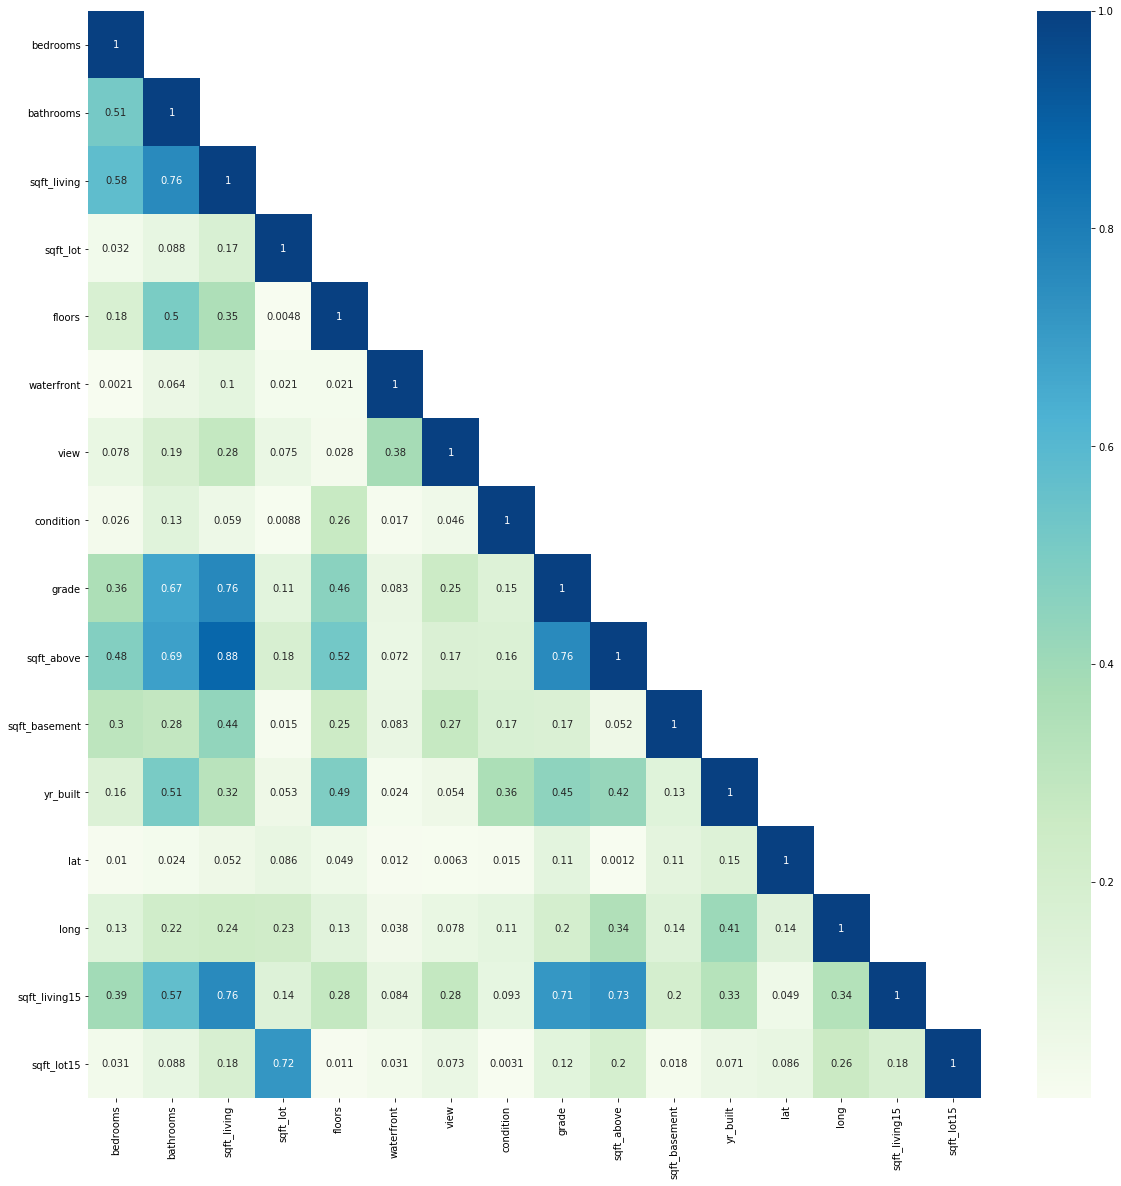

In [24]:
## Create a dataframe containing only the independent variables.  

predictors = kc_data.drop(['id', 'price'], axis=1)
plt.figure(figsize=(20,20))

## Calculate the correlation between each independent variable. 

corr = abs(predictors.corr()) 

## Create a mask to hide the upper triangle of the heatmap.  This is because it is a mirror image of the lower triangle, and therefore adds nothing.

mask = np.triu(corr, k=1)

## Plot the heatmap.

sns.heatmap(corr, annot=True, cmap="GnBu", mask=mask)


It is typical to define variables with a correlation coefficient > 0.75 as collinear.  Applying this definition, the following variables exhibit collinearity:

- sqft_living and sqft_above
- sqft_lot and sqft_lot15

To remove the collinear features, **sqft_above** and **sqft_lot15** will be dropped from the dataset.

In [25]:
## Drop sqft_above and sqft_lot15 from the dataset
kc_data.drop(['sqft_above', 'sqft_lot15'], axis=1, inplace=True)
predictors.drop(['sqft_above', 'sqft_lot15'], axis=1, inplace=True)

## Date is also dropped
predictors.drop('date', axis=1, inplace=True)

### Data Exploration

In this section, we will explore three questions relevant to the prediction of house prices.  This will then be used to guide the construction of a regression model.

The three questions under consideration:

- How does the area in which a property is located affect the price?
- How does the condition of the property affect its price?
- How does the size of the property affect its price?

#### Understanding the Relationship between Area and Price

Given no personal connection to Kings County or Seattle, this model is approached with no expectations as to the link between area and price.  However, as with most cities, one would expect certain areas to be more expensive than others.  

To begin to understand this relationship, **lat** and **long** were plotted against **price**.  A line of best fit was also plotted, in order to assist with visualising the nature of this relationship.

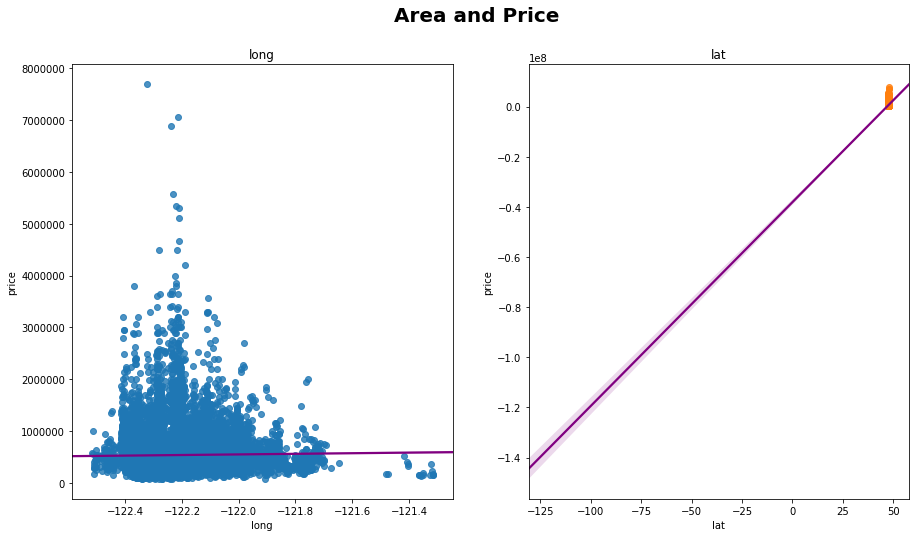

In [26]:
## A new figure is created, with 2 subplots.  The figure is given a title.

fig, axes = plt.subplots(nrows=1, ncols=2)
fig.subplots_adjust(hspace=0.2, wspace=0.2)
fig.set_size_inches(15, 8)
fig.suptitle("Area and Price", fontsize=20, fontweight='bold')

## This for loop creates a regplot for latitude and longitude.  A regplot is a scatter plot, with a line of best fit.

for ax, var in zip(axes.flatten(), ['long', 'lat']):
    sns.regplot(x=var, y='price', data=kc_data, ax=ax, line_kws={"color": 'purple'})
    ax.set(title=var)


The plots above suggest that there only a weak association between price and longitude.  That is, whether a property is located in the east or west has only a slight bearing on the price.

In contrast, the relationship betweeen price and latitude appears stronger.  Therefore, properties in the north appear more expensive than properties in the south.

To investigate this further, the data is split into 4 groups (North-West, North-East, South-West, South-East), and the mean of each is compared:

In [27]:
## Split the data into 4 groups: North-West, North-East, South-West, South-East
kc_nw = kc_data.loc[(kc_data["long"] <= np.median(kc_data["lat"])) & (kc_data["lat"] >= np.median(kc_data["long"]))]
kc_ne = kc_data.loc[(kc_data["long"] > np.median(kc_data["lat"])) & (kc_data["lat"] >= np.median(kc_data["long"]))]
kc_sw = kc_data.loc[(kc_data["long"] <= np.median(kc_data["lat"])) & (kc_data["lat"] < np.median(kc_data["long"]))]
kc_se = kc_data.loc[(kc_data["long"] > np.median(kc_data["lat"])) & (kc_data["lat"] < np.median(kc_data["long"]))]

In [28]:
## List of the dataframes/areas over which the for loop will iterate

area_data = [kc_nw, kc_ne, kc_sw, kc_se]
names = ['NW-Mean', 'NE-Mean', 'SW-Mean', 'SE-Mean']

## For loop which populates a dictionary with the mean price of each area
area_prices = {}
for index, values in enumerate(area_data):
    area_prices[names[index]] = round(np.mean(values['price']),2)


## Transform the dictionary into a dataframe
area_df = pd.DataFrame(list(area_prices.items()), columns=['Area', 'Mean House Price'])
area_df


,Area,Mean House Price
0,NW-Mean,540296.57
1,NE-Mean,NaN
2,SW-Mean,NaN
3,SE-Mean,NaN


The table above confirms our graphical analysis:
- Houses in the North are more expensive on average than those in the South
- Houses in the East are slightly more expensive on average than those in the West

#### Understanding the Relationship between Condition and Price

Intuitively, one would expect properties in good condition to have a higher sales price than those in poor condition.  To investigate whether this is true, we first plot condition against price:

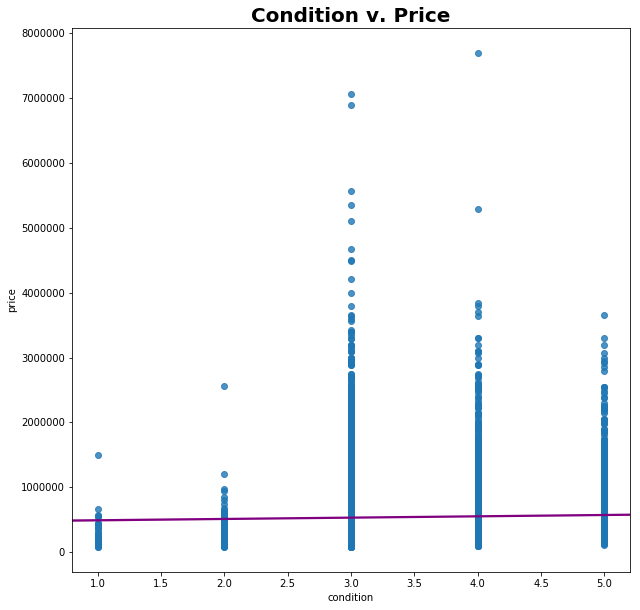

In [29]:
## Create figure of size 10 X 10
plt.figure(figsize=(10,10))

## Create a regression plot of condition against price
sns.regplot(x='condition', y='price', data=kc_data, line_kws={"color": 'purple'})
plt.title("Condition v. Price", fontsize=20, fontweight='bold')
plt.show()



The graph above suggests that houses with the lowest condition score have lower prices.  However, for houses with a condition score above zero, there is then little impact on price.

To see if this visual assessment is correct, the means of each condition can be assessed.

In [30]:
## List of conditions (NB. these have been min-max scaled)

condition = [0.000000, 0.333333, 0.666667,1.000000]

## For loop, creates dictionary of mean per condition score

condition_prices = {}
for index, cond in enumerate(condition):
    df = kc_data.loc[round(kc_data['condition'],6) == cond]
    mean = round(np.mean(df['price']),2)
    condition_prices[condition[index]] = mean

## Converts dictionary to dataframe
    
condition_df = pd.DataFrame(list(condition_prices.items()), columns=['Condition', 'Mean House Price'])
condition_df


,Condition,Mean House Price
0,0.000000,NaN
1,0.333333,NaN
2,0.666667,NaN
3,1.000000,341067.24


This analysis of means broadly confirms our assumption.  The impact of the lowest condition score on price is greater than having any other condition score.

#### Understanding the Relationship between Property Size and Price

One would expect there to be a clear relationship between the size of a property and the price.  There are multiple measures of size in our dataset.  However, to investigate this relationship, **sqft_living** is used.  This is because it should give a good reflection of the size of the whole house.

First, a regplot is created.

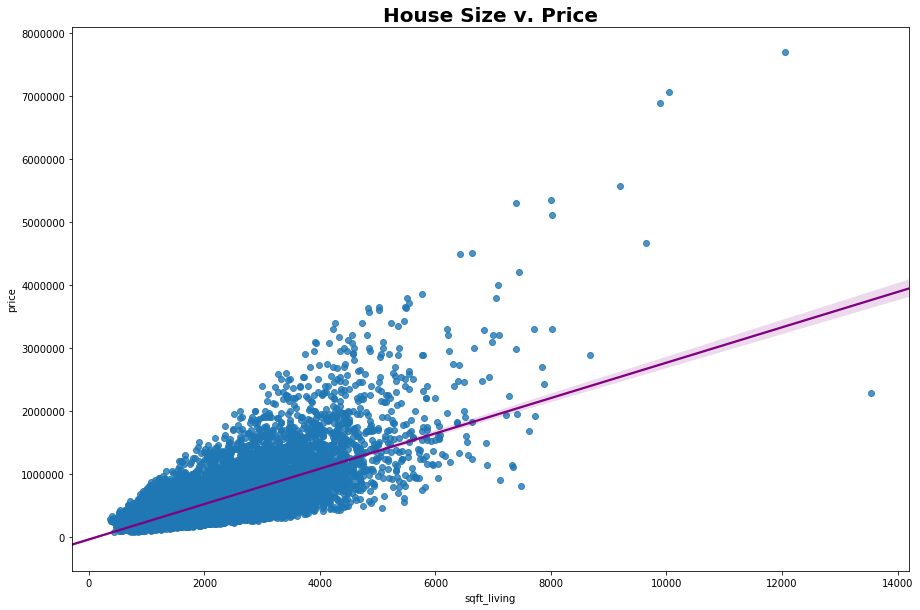

In [31]:
## Create regression plot of price and sqft_living

plt.figure(figsize=(15,10))
sns.regplot(x='sqft_living', y='price', data=kc_data, line_kws={"color": 'purple'})
plt.title("House Size v. Price", fontsize=20, fontweight='bold')
plt.show()

As anticipated, there appears to be a clear relationship between house size and price.

## Building a Model

### Splitting the Data

Before building the model, the data must first be split into a training set and a test set.  The training set will be used to construct the model, and estimate the coefficients.  The test set will be used to evaulate the performance of the model.

In [32]:
## The dataset is split into the dependent variable (y), and the independent variables (X)

X = predictors
y = kc_data['price']

## Split the data into a training set (80%) and a test set (20%)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Fitting the Model

Linear multiple regression will be used to build this house price model.  This approach takes a set of independent variables (predictors), assigns each a coefficient, and uses this information to estimate the value of a dependent variable.  

In this model, **price** is the dependent variable.  

However, there are multiple combinations of independent variables that could be employed.  In order to select the features most valuable to this multiple regression model, a tool known as Recursive Feature Elimination (RFE) will be used.  Using this approach, the number of independent variables desired in the model is specified.  RFE then recursively remvoes the features that perform least well, re-builds the model using the remaining attributes and calculates accuracy.  It is then possible to isolate the combination of attributes that will maximise model performance.  

To understand how many predictors should be included in this model, RFE will be applied for 2 and 4 independent variables.  A model will then be built using all available independent variables.  The model which performs best will be selected.

#### Selecting a Model

In order to select the model, $R^{2}$ and adjusted $R^{2}$ will be used.  

$R^{2}$ measures the proportion of variation in the dependent variable, that can be explained by the model.  It achieves this, by comparing it to the baseline "worst" model (one in which there are no predictors, other than the mean of the dependent variable).  A higher value of $R^{2}$ suggests a model with greater explanatory power.  

Adjusted $R^{2}$ is a similar measure, which addresses one of $R^{2}$'s main drawbacks - that it will always increase as additional predictors are included in the model.  This means that useless variables can be added, and an increase in $R^{2}$ will still be observed.  Adjusted $R^{2}$ makes an allowance for the number of variables included in a model.  It will always be lower than $R^{2}$, and the addition of useless variables will cause it to drop.

#### Model with 2 Independent Variables

In [33]:
## Import the SciKit Libraries required to run RFE

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn import metrics


In [34]:
## Use recursive feature elimination to identify which predictors to include in the model

linreg = LinearRegression()
selector = RFE(linreg, n_features_to_select = 2)
selector = selector.fit(X_train, y_train)

In [35]:
## Create a dictionary detailing which parameters to include.  True indicates a variable should be included in the model.

to_include = dict(zip(X_train.columns.values, selector.support_))
to_include

{'bedrooms': False,
 'bathrooms': False,
 'sqft_living': False,
 'sqft_lot': False,
 'floors': False,
 'waterfront': True,
 'view': False,
 'condition': False,
 'grade': False,
 'sqft_basement': False,
 'yr_built': False,
 'lat': True,
 'long': False,
 'sqft_living15': False}

The RFE method indicates that **yr_built** and **sqft_living** should be inlcuded in the model of two indepdendent variables.  

In [36]:
## Isolate the predictors to be included, in this instance yr_built and sqft_living

X_train_1 = pd.DataFrame(X_train[['yr_built', 'sqft_living']])

Statsmodel is then used to estimate the coefficients and performance of this model.

In [37]:
## Fit the model in Statsmodel (to take advantage the additional statistics provided)

import statsmodels.api as sm

X_train_1 = sm.add_constant(X_train_1)

model = sm.OLS(y_train, X_train_1).fit()

model.summary()


/Users/isobeldaley/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.526
Model:                            OLS   Adj. R-squared:                  0.526
Method:                 Least Squares   F-statistic:                     9570.
Date:                Sun, 04 Aug 2019   Prob (F-statistic):               0.00
Time:                        20:40:26   Log-Likelihood:            -2.3939e+05
No. Observations:               17277   AIC:                         4.788e+05
Df Residuals:                   17274   BIC:                         4.788e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        4.603e+06   1.34e+05     34.259      0.000    4.34e+06    4.87e+06
yr_built    -2382.4364     68.862    -34.597      0.000   -2517.413   -2247.460
sqft_living   304.2865      2.205    137.985      0.000     299.964     308.609
==============================================================================
Omnibus:                    11862.062   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           485490.326
Skew:                           2.786   Prob(JB):                         0.00
Kurtosis:                      28.365   Cond. No.                     2.06e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.06e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Inspecting the above, it can be seen that both $R^{2}$ and Adjusted $R^{2}$ aree around 0.35.  This means that approximately 35% of the variation in price can be explained by the model.  This is lower than desired.  It therefore makes sense to create a new version of the model, with additional variables included.

#### Model with 4 Independent Variables

The RFE method is re-run.  This time it is requested to return 4 features.

In [38]:
## Use recursive feature elimination to identify which predictors to include in the model
selector = RFE(linreg, n_features_to_select = 4)
selector = selector.fit(X_train, y_train)


In [39]:
## Create a list indicating which regressors to include
to_include = dict(zip(X_train.columns.values, selector.support_))
to_include


{'bedrooms': False,
 'bathrooms': False,
 'sqft_living': False,
 'sqft_lot': False,
 'floors': False,
 'waterfront': True,
 'view': False,
 'condition': False,
 'grade': True,
 'sqft_basement': False,
 'yr_built': False,
 'lat': True,
 'long': True,
 'sqft_living15': False}

In [40]:
## Isolate the predictors to be included, in this instance yr_built, sqft_living, waterfront and lat
X_train_2 = pd.DataFrame(X_train[['yr_built', 'sqft_living', 'waterfront', 'lat']])

In [41]:
## Fit the model in Statsmodel (to take advantage the additional statistics provided)
X_train_2 = sm.add_constant(X_train_2)

model = sm.OLS(y_train, X_train_2).fit()

model.summary()

/Users/isobeldaley/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.618
Model:                            OLS   Adj. R-squared:                  0.618
Method:                 Least Squares   F-statistic:                     6979.
Date:                Sun, 04 Aug 2019   Prob (F-statistic):               0.00
Time:                        20:40:26   Log-Likelihood:            -2.3753e+05
No. Observations:               17277   AIC:                         4.751e+05
Df Residuals:                   17272   BIC:                         4.751e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -2.839e+07   6.34e+05    -44.761      0.000   -2.96e+07   -2.71e+07
yr_built    -1663.5922     62.909    -26.444      0.000   -1786.901   -1540.284
sqft_living   284.2731      2.004    141.820      0.000     280.344     288.202
waterfront    8.27e+05   2.12e+04     38.958      0.000    7.85e+05    8.69e+05
lat          6.647e+05   1.26e+04     52.580      0.000     6.4e+05     6.9e+05
==============================================================================
Omnibus:                    12981.914   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           771834.660
Skew:                           3.072   Prob(JB):                         0.00
Kurtosis:                      35.163   Cond. No.                     1.09e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.09e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Both the value of $R^{2}$ and adjusted $R^{2}$ have increased.  This indicates that the model is improved by the inclusion of 4 variables.

#### Model with All Independent Variables

Finally, the model is run using all independent variables.

In [42]:
X_train = sm.add_constant(X_train)

model = sm.OLS(y_train, X_train).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     2776.
Date:                Sun, 04 Aug 2019   Prob (F-statistic):               0.00
Time:                        20:40:26   Log-Likelihood:            -2.3565e+05
No. Observations:               17277   AIC:                         4.713e+05
Df Residuals:                   17262   BIC:                         4.714e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -3.591e+07   1.78e+06    -20.206      0.000   -3.94e+07   -3.24e+07
bedrooms      -3.456e+04   2112.952    -16.357      0.000   -3.87e+04   -3.04e+04
bathrooms      4.763e+04   3651.877     13.043      0.000    4.05e+04    5.48e+04
sqft_living     180.6610      4.109     43.963      0.000     172.606     188.716
sqft_lot         -0.0428      0.040     -1.069      0.285      -0.121       0.036
floors         3169.0922   4047.809      0.783      0.434   -4765.025    1.11e+04
waterfront     5.934e+05   2.04e+04     29.020      0.000    5.53e+05    6.33e+05
view           5.251e+04   2376.620     22.094      0.000    4.79e+04    5.72e+04
condition      2.725e+04   2611.527     10.436      0.000    2.21e+04    3.24e+04
grade          9.631e+04   2429.288     39.645      0.000    9.15e+04    1.01e+05
sqft_basement   -35.4416      4.927     -7.193      0.000     -45.100     -25.783
yr_built      -2675.9235     77.141    -34.689      0.000   -2827.128   -2524.719
lat            5.578e+05   1.18e+04     47.216      0.000    5.35e+05    5.81e+05
long          -1.141e+05   1.34e+04     -8.504      0.000    -1.4e+05   -8.78e+04
sqft_living15    23.5213      3.872      6.074      0.000      15.931      31.112
==============================================================================
Omnibus:                    15640.274   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1934118.638
Skew:                           3.892   Prob(JB):                         0.00
Kurtosis:                      54.246   Cond. No.                     4.98e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.98e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The value of both $R^{2}$ and adjusted $R^{2}$ have increased again.  Now, around 70% of the variation in price can be explained by the model.  Given that adjusted $R^{2}$ has not fallen, this is the model that will be used.

#### Evaluating the performance of the Model

To evaluate the model, one can compare the predicted and actual values.  A big difference between predicted and actual values could indicate a poorly performing model. The Root Mean Square Error (RMSE) provides a useful statistic that provides a summary of this:

RMSE = $\sqrt{\frac{1}{n}\sum_{i=1}^{n}(y_{i} - \hat y_{i})^2}$

It is also possible to confirm that the model is generalisable.  This can be done by comparing the RMSE of the model using the data it was trained with, and the RMSE of the model using data is was not trained with.  If these values are significantly different, the model may have been overfitted.

The Python library SciKit Lean makes it easy to make this comparison using in-built functions.  However, to take advantage of this functionality, it is first necessary to rebuild the regression model within SciKit Learn.

In [43]:
## Fit the model in SKlearn

X_train_no_const = X_train.drop('const', axis=1)

regressor = LinearRegression()
regressor.fit(X_train_no_const, y_train)

## Create an dataframe, listing the coefficient for each predictor.  This will be used to confirm that the model is 
## identifcal, regardless of whether it is in SKLearn or Statsmodels.

coefficients = {'Label': X_train_no_const.columns, 'Coefficients':regressor.coef_ }
coeff_df = pd.DataFrame(coefficients)
coeff_df

,Label,Coefficients
0,bedrooms,-34561.063297
1,bathrooms,47630.782125
2,sqft_living,180.661040
3,sqft_lot,-0.042785
4,floors,3169.092217
5,waterfront,593354.367311
6,view,52508.895820
7,condition,27254.083936
8,grade,96309.430191
9,sqft_basement,-35.441578


SciKit Learn is then used to calcualte house price predictions using the chosen model.

In [44]:
## To evaluate the performance of the model, calculate the house price predictions

y_pred_test = regressor.predict(X_test)

y_pred_train = regressor.predict(X_train_no_const)

The RMSE is then calculated for both the test and training dataset:

In [45]:
## The difference between the actual and predicted values can be compared

print('Root Mean Squared Error (TRAIN):', np.sqrt(metrics.mean_squared_error(y_pred_train, y_train)))
print('Root Mean Squared Error (TEST):', np.sqrt(metrics.mean_squared_error(y_pred_test, y_test)))

Root Mean Squared Error (TRAIN): 202903.76450523845
Root Mean Squared Error (TEST): 203515.33680097788


The difference between the RMSE calculated using the training set, is compared to the RMSE calculated using the test set:

In [46]:
## The difference between teh actual and predicted values can be compared

Difference =  np.sqrt(metrics.mean_squared_error(y_pred_train, y_train)) - np.sqrt(metrics.mean_squared_error(y_pred_test, y_test))
Difference


-611.5722957394319

As can be seen, the difference between the RMSE for the test and training set is very small.  This suggests that the model is not overfitted, and will perform well for new data.

Finally, to provide a visual aid to understanding the performance of the model, the actual and predicted values are plotted in a bar chart for the first 25 observations in the test dataset.

In [47]:
## Create a dataframe of the first 25 actual and predicted house prices values
act_v_pred = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_test})
act_v_pred_25 = act_v_pred.head(25)



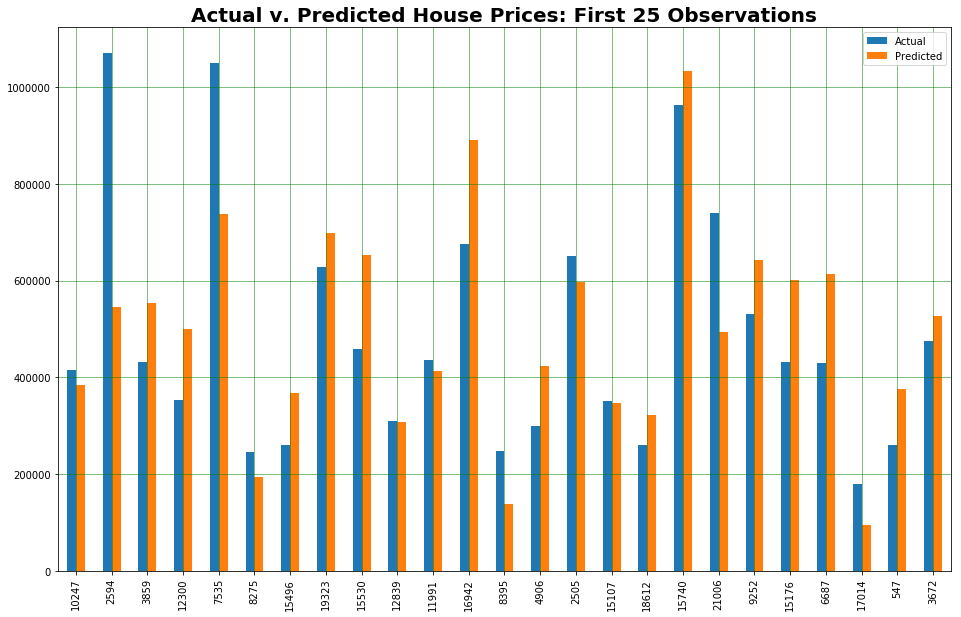

In [48]:
## Plot a bar chart showing difference between actual and predicted values 

act_v_pred_25.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.title("Actual v. Predicted House Prices: First 25 Observations", fontsize=20, fontweight='bold')
plt.show()

The graph above shows that the model is betwee at predicting average values, and is less accuate when prices are low or high.

### Interpretation

All coefficients within the chosen model have a p value of less than 5%.  That all included variables have a significant impact on price.

Since the data was scaled using a min-max transformation, the relative size of each coefficient does reflect the relative magnitude of each variables contribution to house prices.

Suprisingly, it appears that the year in which the house was built (**yr_built**) has the largest impact on price.  The size of the living space (**sqft_living**), and the latitude (**lat**) are also important contributors.  

In [49]:
kc_data_describe = kc_data2.describe()
kc_data_describe.drop(['id', 'price'], axis=1, inplace=True)
kc_data_describe.drop(['mean', 'count', 'std', '25%', '50%', '75%'], axis=0, inplace=True)

In [50]:
parameters = model.params.drop(['const'])

In [51]:
kc_data_describe = kc_data_describe.transpose()

In [52]:
kc_data_describe['coefficients'] = parameters

In [53]:
kc_data_describe.drop(['sqft_above', 'sqft_lot15'], axis=0, inplace=True)

In [54]:
kc_data_describe['scale'] = 1/(kc_data_describe['max'] - kc_data_describe['min'])

In [55]:
kc_data_describe['1% Increase'] = (kc_data_describe['coefficients']*kc_data_describe['scale'])*100

In [56]:
kc_data_describe

,min,max,coefficients,scale,1% Increase
bedrooms,1.0000,3.300000e+01,-34561.063297,3.125000e-02,-1.080033e+05
bathrooms,0.5000,8.000000e+00,47630.782125,1.333333e-01,6.350771e+05
sqft_living,370.0000,1.354000e+04,180.661040,7.593014e-05,1.371762e+00
sqft_lot,520.0000,1.651359e+06,-0.042785,6.057526e-07,-2.591704e-06
floors,1.0000,3.500000e+00,3169.092217,4.000000e-01,1.267637e+05
waterfront,0.0000,1.000000e+00,593354.367311,1.000000e+00,5.933544e+07
view,0.0000,4.000000e+00,52508.895820,2.500000e-01,1.312722e+06
condition,1.0000,5.000000e+00,27254.083936,2.500000e-01,6.813521e+05
grade,3.0000,1.300000e+01,96309.430191,1.000000e-01,9.630943e+05
sqft_basement,0.0000,4.820000e+03,-35.441578,2.074689e-04,-7.353024e-01
